# **Problem Statement**

# Perform EDA on SampleSuperStore dataset

# **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

# **Load the Dataset**

In [5]:
df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
df.shape

(9994, 13)

In [11]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

# **Check the missing values**

In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

By seeing this we will get to know that there is no missing values in dataset.

# **Full summary of the dataset**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# **Statistical details of the dataset**

In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# **Function return Series with number of distinct observations over requested axis**

In [12]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# **Find the correlation of dataset**

In [13]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


# **Find the covariance of dataset**

In [14]:
df.cov()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


# **HEATMAP OF DATASET**

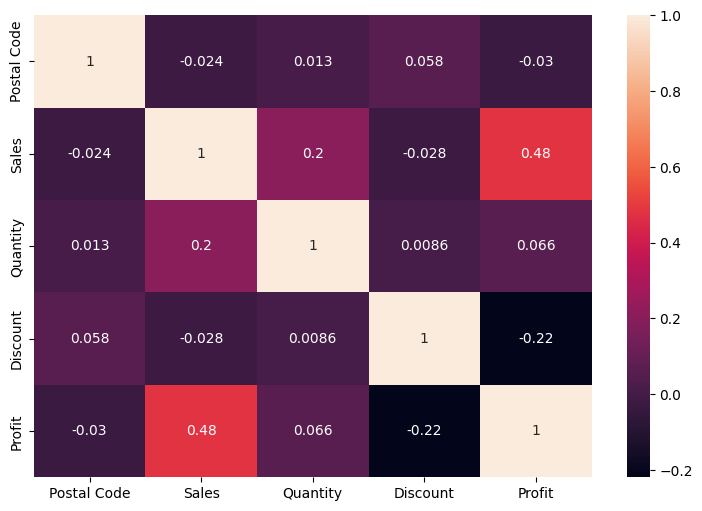

In [15]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.corr(), annot= True)
plt.show()

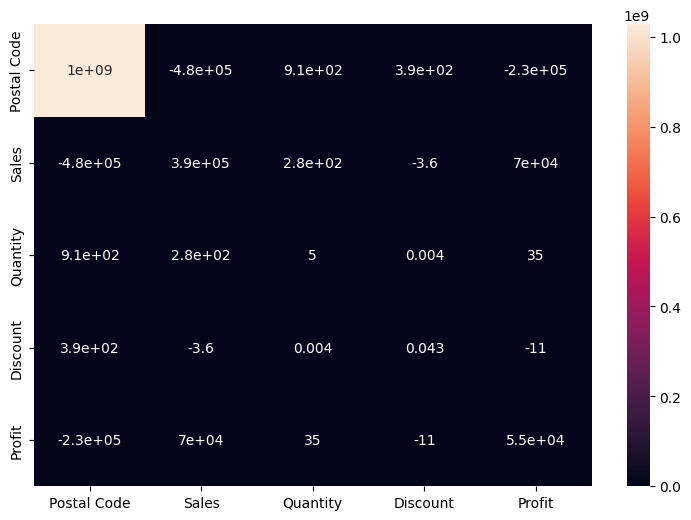

In [16]:
fig,axes = plt.subplots(1,1,figsize=(9,6))
sns.heatmap(df.cov(), annot= True)
plt.show()

# **1.Which shipping mode does customer choose based on the products category and sum of the quantity?**

In [17]:
df_shipmode = df[['Ship Mode','Category','Quantity']].groupby(['Ship Mode','Category']).sum('Quantity')
df_shipmode

Quantity
Ship Mode      Category                 
First Class    Furniture            1238
               Office Supplies      3372
               Technology           1083
Same Day       Furniture             453
               Office Supplies      1147
               Technology            360
Second Class   Furniture            1569
               Office Supplies      4480
               Technology           1374
Standard Class Furniture            4768
               Office Supplies     13907
               Technology           4122

<Axes: title={'center': 'Ship Mode vs Sum of Quantity'}, xlabel='Ship Mode with Category', ylabel='Sum of Quantity'>

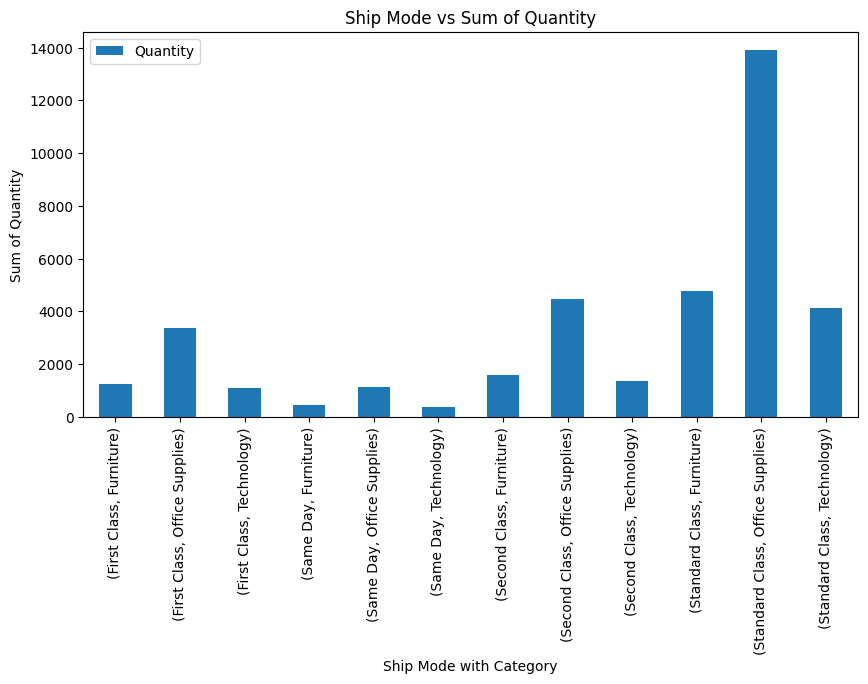

In [18]:
df_shipmode.plot(kind='bar', title='Ship Mode vs Sum of Quantity', ylabel='Sum of Quantity',
         xlabel='Ship Mode with Category', figsize=(10, 5))

# Conclusion: Most of the customers prefer to choose Standard mode for shipping while compared to other modes.

# **2. Maximum number of Sales from which State?**

In [19]:
state_sales_df = pd.pivot_table(data=df[['State','Sales']], 
                        index=['State'], 
                        values='Sales',
                        aggfunc='max')

state_sales_df.sort_values(by='Sales', ascending=False).head(10)

,Sales
State,
Florida,22638.480
Indiana,17499.950
Washington,13999.960
New York,11199.968
Delaware,10499.970
Michigan,9892.740
Minnesota,9449.950
New Jersey,9099.930
Virginia,8749.950


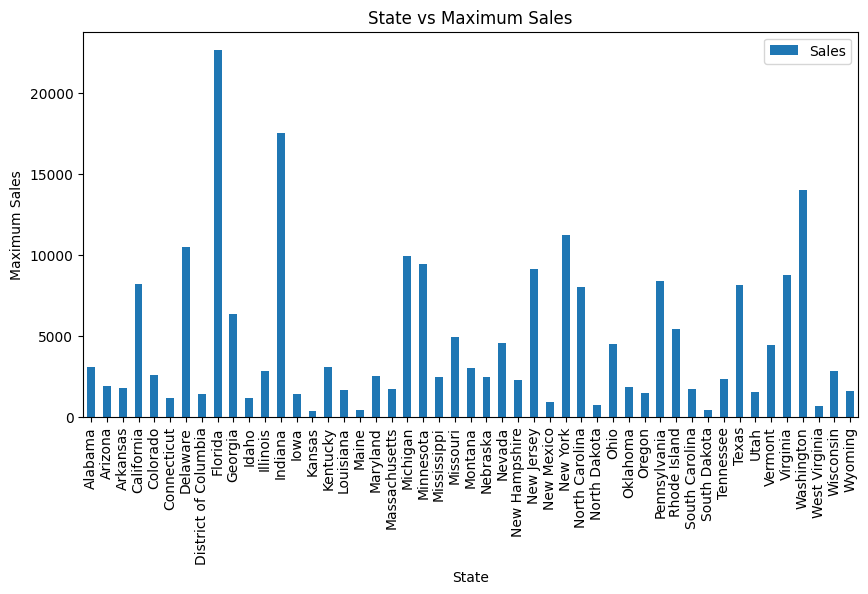

In [20]:
state_sales_df.plot(kind='bar', title='State vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='State', figsize=(10, 5));

# Conclusion: From Florida we got maximum sales.

# **3. From which State we got maximum profit?**

In [21]:
state_profit_df = pd.pivot_table(data=df[['State','Profit']], 
                        index=['State'], 
                        values='Profit',
                        aggfunc='max')

state_profit_df.sort_values(by='Profit', ascending=False).head(10)

,Profit
State,
Indiana,8399.9760
Washington,6719.9808
Delaware,5039.9856
Michigan,4946.3700
Minnesota,4630.4755
New York,3919.9888
Georgia,3177.4750
Virginia,2799.9840
Rhode Island,2591.9568


<Axes: title={'center': 'State vs Maximum Profit'}, xlabel='State', ylabel='Maximum Profit'>

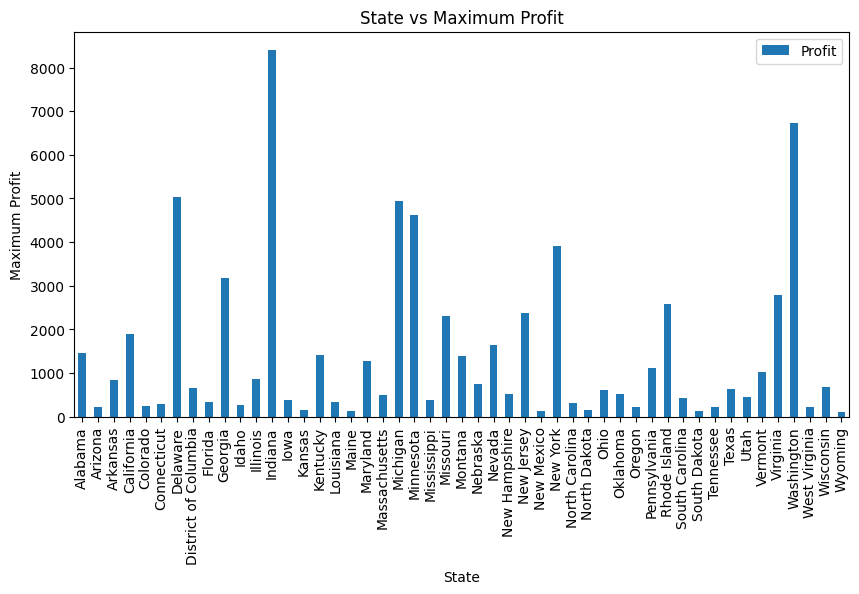

In [22]:
state_profit_df.plot(kind='bar', title='State vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='State', figsize=(10, 5))

# Conclusion: From Indiana we got maximum profit.

# **4. Which Products are selling the most?**

In [23]:
df_Category_sales = pd.pivot_table(data=df[['Category','Sub-Category','Sales']], 
                        index=['Category','Sub-Category'], 
                        values='Sales',
                        aggfunc='max')

df_Category_sales

Sales
Category        Sub-Category           
Furniture       Bookcases      4404.900
                Chairs         4416.174
                Furnishings    1336.440
                Tables         4297.644
Office Supplies Appliances     2625.120
                Art            1113.024
                Binders        9892.740
                Envelopes       604.656
                Fasteners        93.360
                Labels          786.480
                Paper           733.950
                Storage        2934.330
                Supplies       8187.650
Technology      Accessories    3347.370
                Copiers       17499.950
                Machines      22638.480
                Phones         4548.810

<Axes: title={'center': 'Category vs Maximum Sales'}, xlabel='Category', ylabel='Maximum Sales'>

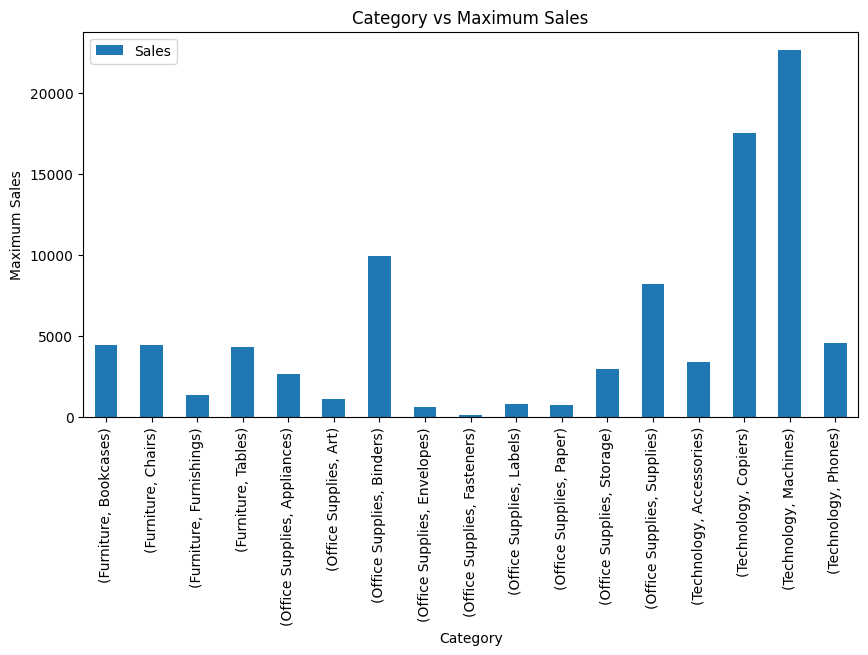

In [24]:
df_Category_sales.plot(kind='bar', title='Category vs Maximum Sales', ylabel='Maximum Sales',
         xlabel='Category', figsize=(10, 5))

# Conclusion: Machines from Technology category are selling the most.

# **5. Which Products are purchased in more quantity?**

In [25]:
df_Category_quantity = pd.pivot_table(data=df[['Category','Sub-Category','Quantity']], 
                        index=['Category','Sub-Category'], 
                        values='Quantity',
                        aggfunc='sum')

df_Category_quantity

Quantity
Category        Sub-Category          
Furniture       Bookcases          868
                Chairs            2356
                Furnishings       3563
                Tables            1241
Office Supplies Appliances        1729
                Art               3000
                Binders           5974
                Envelopes          906
                Fasteners          914
                Labels            1400
                Paper             5178
                Storage           3158
                Supplies           647
Technology      Accessories       2976
                Copiers            234
                Machines           440
                Phones            3289

<Axes: title={'center': 'Category vs Sum of Quantity'}, xlabel='Category', ylabel='Sum of Quantity'>

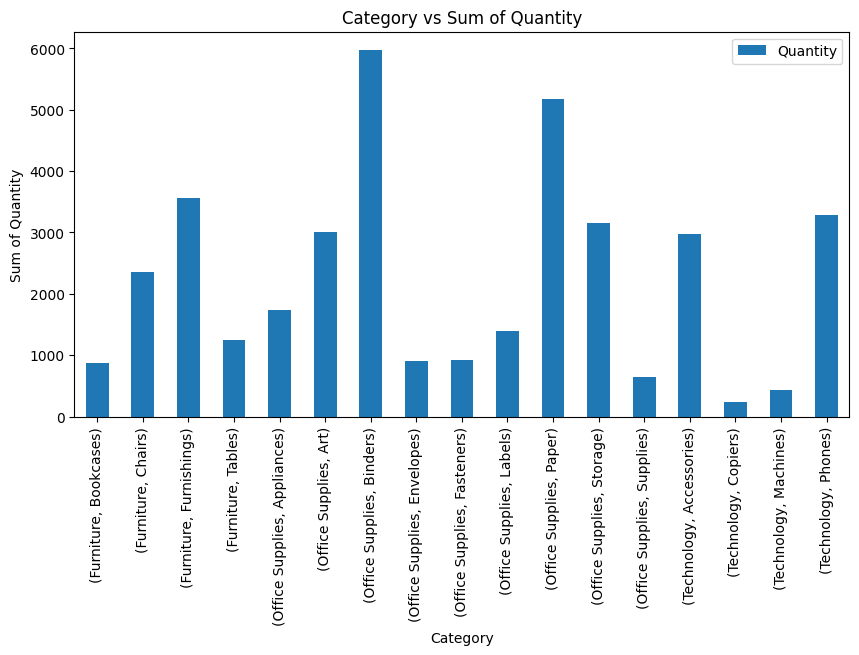

In [26]:
df_Category_quantity.plot(kind='bar', title='Category vs Sum of Quantity', ylabel='Sum of Quantity',
         xlabel='Category', figsize=(10, 5))

# Conclusion: Binders from Office Suppliers category are purchased in more quantity.

# **6. By selling which products we got the maximum profit?**

In [27]:
df_Category_profit = pd.pivot_table(data=df[['Category','Sub-Category','Profit']], 
                        index=['Category','Sub-Category'], 
                        values='Profit',
                        aggfunc='max')

df_Category_profit

Profit
Category        Sub-Category           
Furniture       Bookcases     1013.1270
                Chairs         770.3520
                Furnishings    387.5676
                Tables         629.0100
Office Supplies Appliances     793.7160
                Art            112.5740
                Binders       4946.3700
                Envelopes      204.0714
                Fasteners       21.8880
                Labels         385.3752
                Paper          352.2960
                Storage        792.2691
                Supplies       327.5060
Technology      Accessories    829.3754
                Copiers       8399.9760
                Machines      2799.9840
                Phones        1228.1787

<Axes: title={'center': 'Category vs Maximum Profit'}, xlabel='Category', ylabel='Maximum Profit'>

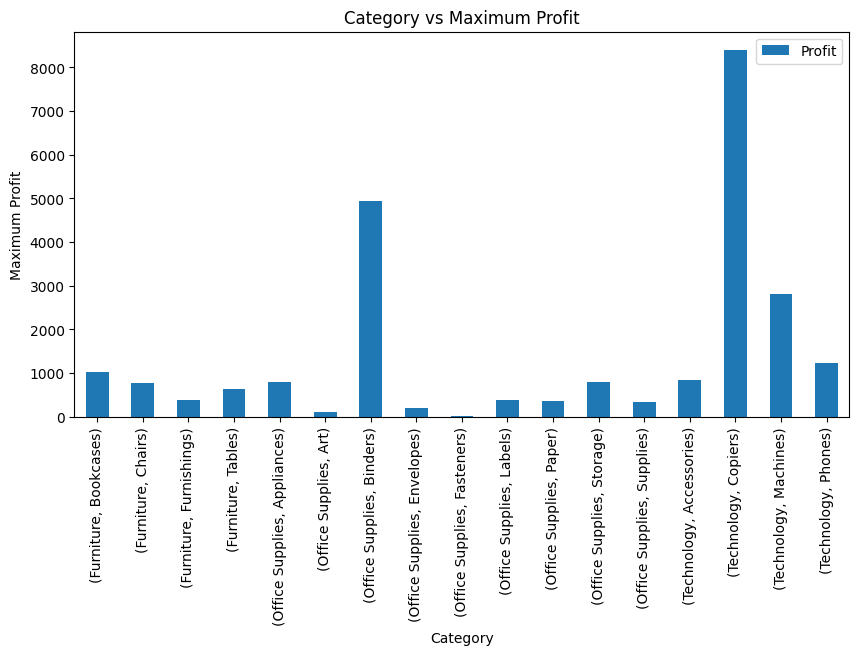

In [28]:
df_Category_profit.plot(kind='bar', title='Category vs Maximum Profit', ylabel='Maximum Profit',
         xlabel='Category', figsize=(10, 5))

# Conclusion: By selling Copiers from Technology category we got the maximum profit.

# **Final Conclusion:**

1.Most of the customers prefer to choose 
Standard mode for shipping while Compared to other modes.

2.From Florida we got maximum sales.

3From Indiana we got maximum profit.

4.Machines from Technology category are selling the most.

5.Binders from Office Suppliers category are purchased in more quantity.

6.By selling Copiers from Technology category we got the maximum profit.